# Linear Algebra for Graphs

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

## 1 The gradient, incidence and Laplacian matrices

### 1.1 Simple unweighted, undirected graph: the path graph

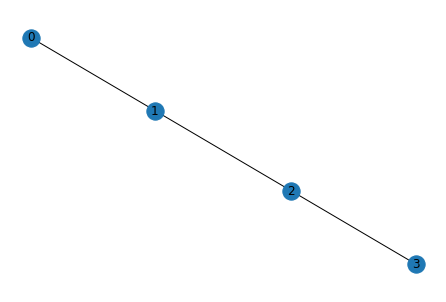

In [3]:
Gl = nx.path_graph(4)
nx.draw(Gl, with_labels=True)

In [4]:
A = nx.adjacency_matrix(Gl)
A.todense() # numpy matrix

matrix([[0, 1, 0, 0],
        [1, 0, 1, 0],
        [0, 1, 0, 1],
        [0, 0, 1, 0]], dtype=int32)

In [6]:
S = nx.incidence_matrix(Gl, oriented=True)
S.todense()

matrix([[-1.,  0.,  0.],
        [ 1., -1.,  0.],
        [ 0.,  1., -1.],
        [ 0.,  0.,  1.]])

In [7]:
S.dot(S.T).todense()

matrix([[ 1., -1.,  0.,  0.],
        [-1.,  2., -1.,  0.],
        [ 0., -1.,  2., -1.],
        [ 0.,  0., -1.,  1.]])

In [8]:
L = nx.laplacian_matrix(Gl)
L.todense()

matrix([[ 1, -1,  0,  0],
        [-1,  2, -1,  0],
        [ 0, -1,  2, -1],
        [ 0,  0, -1,  1]], dtype=int32)

### 1.2 Connection with the standard discrete setting

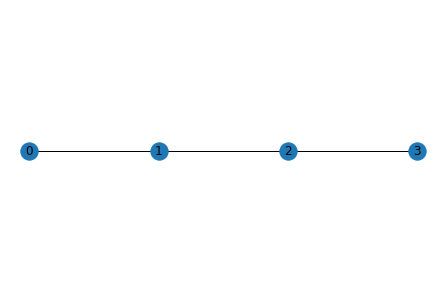

In [9]:
# Let us build the path graph again
Gl = nx.path_graph(4)
pos = dict((n,(n,0)) for n in Gl.nodes())
nx.draw(Gl, pos, with_labels=True)

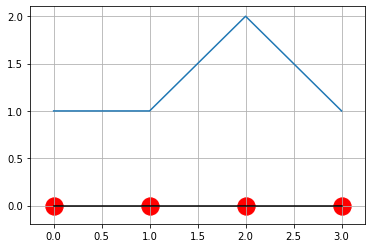

In [20]:
# Example of a function on the nodes
f = [1, 1, 2, 1]
# Plot the function
plt.plot(f)
# plot the path graph
plt.plot([0, 1, 2, 3], [0, 0, 0, 0], 'k')  # black line
plt.scatter(*zip(*pos.values()), c='r', s=300)  # red dots
plt.grid()